<a href="https://colab.research.google.com/github/malleedi/COMP562FinalProject/blob/main/LR_with_Geopy_Point_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Statements

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import preprocessing, svm, metrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

Load Data

In [10]:
df = pd.read_csv('socal2.csv')
df.head()

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


Linear Regression on given Numerical Data

In [16]:
# Iterating only on location and house value

# Not considering image value

# can't regress on street data, as it stored as a string

df_cut = df[['n_citi', 'bed', 'bath', 'sqft', 'price']]

df_cut.head()

,n_citi,bed,bath,sqft,price
0,317,3,2.0,1560,201900
1,48,3,2.0,713,228500
2,152,3,1.0,800,273950
3,48,3,1.0,1082,350000
4,55,4,3.0,2547,385100


<Axes: xlabel='sqft', ylabel='price'>

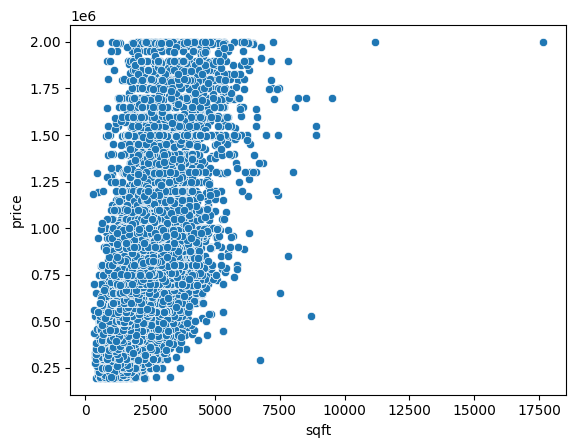

In [17]:
sns.scatterplot(x='sqft',
                y='price', data=df_cut)

In [40]:
X = df_cut.drop("price", axis=1)
y = df_cut['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
X_test

,n_citi,bed,bath,sqft
319,24,4,2.1,3221
6466,265,2,2.0,2156
13288,320,2,2.0,1016
7335,175,3,3.1,2800
15050,59,3,2.0,1495
...,...,...,...,...
10321,117,4,2.1,3031
7052,310,5,4.1,4253
15009,253,3,2.0,1248
11433,46,3,2.0,2066


In [42]:
# model evaluation
print(
  'mean_squared_error : ', metrics.mean_squared_error(y_test, predictions))
print(
  'percentage mean error : ', metrics.mean_absolute_percentage_error(y_test, predictions))

mean_squared_error :  92360631357.8596
mean_absolute_error :  0.39580885435161683


Converting Addresses to Latitude and Longitute Values

In [23]:
import geopy

In [24]:
from geopy.extra.rate_limiter import RateLimiter

locator = geopy.geocoders.Nominatim(user_agent='myGeocoder')

# need to delay calls to Nominatim by approximately 1 second
# else, call withr will get rejected
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

address = df['street'] + [', ']*15474 + df['citi']
df_add = df[['bed', 'bath', 'sqft', 'price']]

Nominatim Conversion from String to Point

In [ ]:
# this takes a while, so only run once. store the results as lat_long.csv

# size = len(df)

# lats = [None]*size
# longs = [None]*size

# for i in np.arange(size):
#     location = geocode(address[i])
#     if (location):
#         [lats[i], longs[i]] = [location.latitude, location.longitude]
#     else:
#         [lats[i], longs[i]] = [None, None]
    
# dfsize = df.head(size).copy()
# dfsize['lat'] = lats
# dfsize['long'] = longs
# dfsize = dfsize[dfsize['lat'] == dfsize['lat']][['bed', 'bath', 'sqft', 'price', 'lat', 'long']]
# dfsize

# dfsize.to_csv("lat_long.csv")

Training and Testing Address Regression

In [33]:
dfsize = pd.read_csv('lat_long.csv', index_col=[0])
dfsize.head()

,bed,bath,sqft,price,lat,long
2,3,1.0,800,273950,32.819845,-115.561435
3,3,1.0,1082,350000,32.971534,-115.543296
4,4,3.0,2547,385100,32.691976,-115.480170
5,3,1.0,1082,350000,32.971534,-115.543296
6,4,3.0,2769,415000,32.681839,-115.482385


<Axes: xlabel='lat', ylabel='price'>

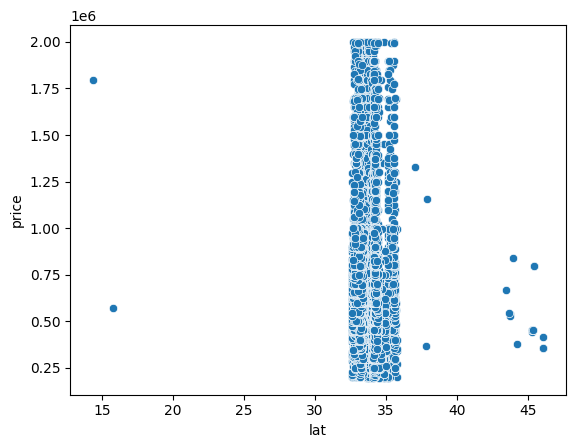

In [34]:
sns.scatterplot(x='lat',
                y='price', data=dfsize)

In [35]:
X = dfsize.drop("price", axis=1)
y = dfsize['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [38]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# model evaluation
print(
  'mean_squared_error : ', metrics.mean_squared_error(y_test, predictions))
print(
  'percentage mean error : ', metrics.mean_absolute_percentage_error(y_test, predictions))

# A small improvement. However, the fraction of data lost due to Nominatim
# not containing the addresses (23%), as well as the amount of time it takes
# Nominatim to run on a large dataset, makes this approach not scaleable, or
# particularly effective, since it just won't work on certain addresses. 

mean_squared_error :  94866276874.99113
mean_absolute_error :  0.3763862577882539
